## Método del Intervalo Medio

#### Importamos librerías

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#### Función intervalo medio

Definimos la función

In [2]:
def f(x):
    return 24*x**3-2*x**2-5*x+1

Función del Intervalo Medio

In [3]:
start_time = time.time()
def calcular_intervalo_medio(a, b, E):
    if f(a) * f(b) >= 0:
        print("El método del intervalo medio no puede aplicarse a este intervalo.")
        return None

    n = math.ceil((math.log(b - a) - math.log(E)) / math.log(2))  # cantidad de iteraciones necesarias
    print(f"Cantidad de iteraciones estimadas: {n}\n")

    iteraciones = 0
    puntos_medios = []
    valores_iteraciones = []

    while (b - a) / 2 > E:
        c = (a + b) / 2
        puntos_medios.append(c)
        #print(f"Iteración {iteracion}: Intervalo [{a}, {b}], Punto medio = {c}")
        error = abs(b - a)
        valores_iteraciones.append([iteraciones + 1, c, f(c), (a, b), error])

        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        #print(f"Error cometido: {abs(b - a) / 2}\n")
        iteraciones += 1

    #print(f"Raíz aproximada: {(a + b) / 2}")
    #print(f"Error final: {(b - a) / 2}")
    return valores_iteraciones, puntos_medios
end_time = time.time()

#### Gráfico

In [4]:
def graficar_intervalo_medio(puntos_medios, a, b):
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(a, b, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="f(x)", color='blue')
    plt.axhline(0, color='black', linewidth=0.5)

    for i, c in enumerate(puntos_medios):
        plt.plot(c, f(c), 'ro')
        plt.text(c, f(c), f'Iter {i+1}', fontsize=12, verticalalignment='bottom')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Método del Intervalo Medio')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Tabla

In [9]:
def tabla_intervalo_medio(valores_iteraciones):
    df = pd.DataFrame(valores_iteraciones, columns=['Iteración', 'x', 'f(x)', 'Intervalo (a, b)', 'Error'])

    # Guardar el DataFrame en un archivo CSV
    df.to_csv('tabla_intervalo_medio.csv', index=False)
    return df

#### Ejecución

Gráfico

Cantidad de iteraciones estimadas: 7



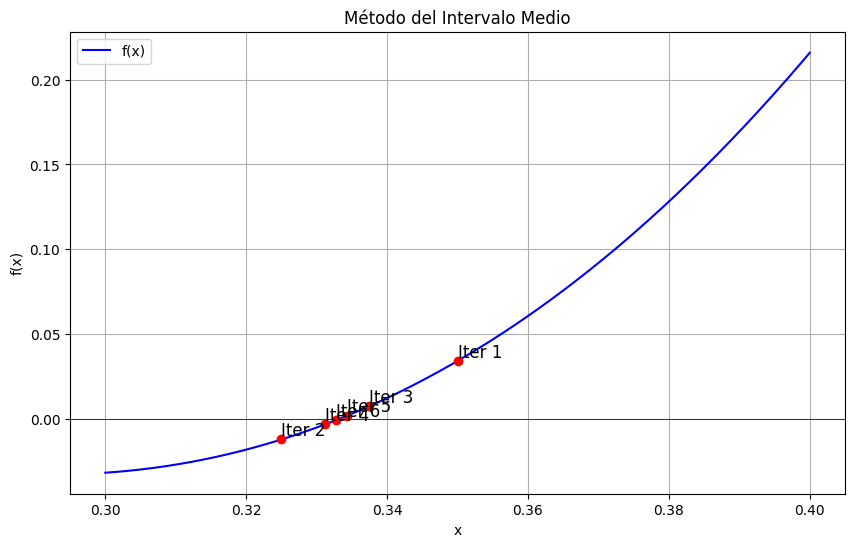

El tiempo de ejecución fue: 0.000404 segundos


In [10]:
a = 0.3
b = 0.4
E = 0.001

valores_iteraciones, puntos_medios = calcular_intervalo_medio(a, b, E)

df = tabla_intervalo_medio(valores_iteraciones)
graficar_intervalo_medio(puntos_medios, a, b)
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

Tabla

In [11]:
calcular_intervalo_medio(a, b, E)
df_intervalo_medio = pd.read_csv('tabla_intervalo_medio.csv')
df_intervalo_medio

Cantidad de iteraciones estimadas: 7



,Iteración,x,f(x),"Intervalo (a, b)",Error
0,1,0.350000,0.034000,"(0.3, 0.4)",0.100000
1,2,0.325000,-0.012375,"(0.3, 0.35)",0.050000
2,3,0.337500,0.007328,"(0.32499999999999996, 0.35)",0.025000
3,4,0.331250,-0.003377,"(0.32499999999999996, 0.33749999999999997)",0.012500
4,5,0.334375,0.001760,"(0.33124999999999993, 0.33749999999999997)",0.006250
5,6,0.332812,-0.000862,"(0.33124999999999993, 0.334375)",0.003125
